In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [102]:
df = pd.read_csv('startups.csv', parse_dates=['date'], dayfirst=True)

In [103]:
df.head()

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
0,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity LLC,Series C,65.611,1,2020
1,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures (formerly IDG Ventures),Series A,73.368,1,2020
2,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity,1222.800,1,2020
3,2020-01-09,MamaEarth,eCommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital,Series B,149.661,1,2020
4,2020-01-09,Byju's,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,1630.400,1,2020


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2876 non-null   datetime64[ns]
 1   startup          2876 non-null   object        
 2   vertical         2876 non-null   object        
 3   subvertical      2876 non-null   object        
 4   location         2876 non-null   object        
 5   investor         2876 non-null   object        
 6   investment_type  2876 non-null   object        
 7   amount           2876 non-null   float64       
 8   month            2876 non-null   int64         
 9   year             2876 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 224.8+ KB


In [73]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

In [6]:
df.isnull().sum()

date               0
startup            0
vertical           0
subvertical        0
location           0
investor           0
investment_type    0
amount             0
dtype: int64

In [7]:
df['investor'].nunique()

2120

In [8]:
df['startup'].nunique()

2114

In [9]:
df['location'].nunique()

72

In [10]:
df['investor'].shape

(2876,)

In [11]:
sorted(set(df['investor'].str.split(',').sum()))

['021 Capita',
 '100 Co-founders Lab',
 '122 West Ventures',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '3one4 Capital',
 '3one4 Capital Advisors LLP',
 '500 Startups',
 '50K Ventures',
 '91SpringBoard',
 '91maker.com',
 'A M Sik',
 'A91 Partners',
 'AB Kinnevik',
 'ABB Technology Ventures',
 'ABCOM Investments',
 'ABI-Showatech (India) Ltd',
 'ABM Knowledgeware',
 'ADAG Reliance Private Equity',
 'AECAL',
 'AET Fund',
 'AJ Ventures',
 'AL Nour International Holdings',
 'ANI Technologies Pvt. Ltd',
 'APIS Partners',
 'ASK Pravi',
 'ASP Consulting',
 'AV Thomas Group',
 'AVG Group',
 'AVN Business Solutions',
 'Aakrit Vaish',
 'Aamir Khan',
 'Aarin Capital',
 'Aarti Group',
 'Aaruha Technology Fund',
 'Aavishkaar',
 'Aavishkaar Venture Management',
 'Aavya Ventures',
 'Abaran Deep',
 'Abhai S. Rao',
 'Abhay Singhal',
 'Abhijit Avasthi',
 'Abhijit Bh',
 'Abhinav Bindra',
 'Abhinav Gupta',
 'Abhinav Mathur',
 'Abhinav Patodia',
 'Abhinav Sinha',
 'Abhishek Acharya',
 'Abhishek Agarwal

In [12]:
print(df[df['investor'].str.contains("Sequoia Capital")]['startup'].nunique())

81


In [13]:
df[df['investor']=='Sequoia Capital India']['startup'].values

array(['Zarget', 'Vymo', 'Awfis', 'Progcap'], dtype=object)

In [23]:
df[df['investor'].str.contains("Sequoia Capital India")]['startup'].unique()

array(['Zilingo', 'PepperTap', 'CraftsVilla', 'HealthKart',
       'Mad Street Den', 'FreshDesk', 'Zarget', "Byju's", 'Druva',
       'Daily hunt', 'Zefo', 'Vymo', 'Knowlarity', 'Pocket Aces',
       'CueMath', 'Faasos', 'OyoRooms', 'Awfis', 'OncoStem', 'MoneyTap',
       '1mg', 'MedGenome', 'Unacademy', 'CleverTap', 'Samosa Labs',
       'Drip capital', 'Meesho', 'Metro Bikes', 'Progcap', 'CarDekho',
       'FPL Technologies', 'Moglix'], dtype=object)

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='startup'>

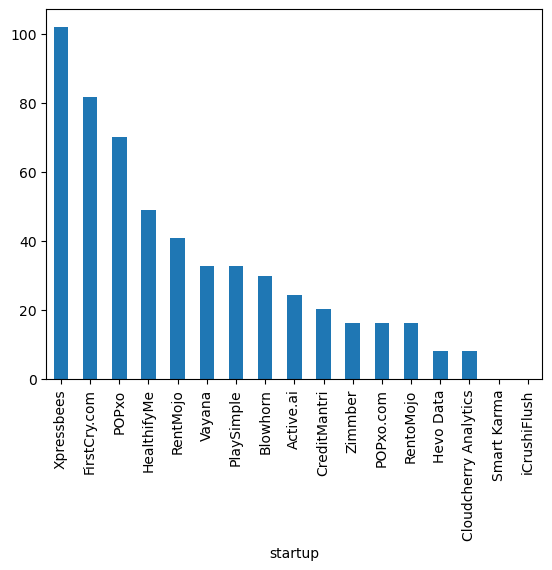

In [16]:
df[df['investor'].str.contains('IDG Ventures India')].groupby('startup')['amount'].sum().sort_values(ascending=False).plot(kind='bar')

In [17]:
round(df['amount'].max())

31793

In [14]:
df[df['startup']=="Rapido Bike Taxi"]

,date,startup,vertical,subvertical,location,investor,investment_type,amount
1097,2016-04-18,Rapido Bike Taxi,Transportation,Bike Aggregator App,Bangalore,"Pawan Munjal,AdvantEdge Partners,Astarc Ventures",Private Equity,0.000
2288,2017-09-25,Rapido Bike Taxi,Transportation,Bike Aggregator Mobile App,Bangalore,Battery Road Digital Holdings LLC,Seed Funding,3.440
2393,2017-11-21,Rapido Bike Taxi,Transportation,Bike and Taxi pooling online platform,Hyderabad,"Skycatcher Fund,Aravind Sanka",Seed/ Angel Funding,2.684
2829,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,WestBridge Capital,Series B,31792.800


In [19]:
df[df['startup']=="Rapido"]

,date,startup,vertical,subvertical,location,investor,investment_type,amount


In [20]:
df['startup']=df['startup'].apply(lambda x:str(x).replace('Rapido Bike Taxi Bike Taxi','Rapido Bike Taxi'))

In [21]:
df.loc[df['startup']=="Rapido", 'vertical'] = df[df['startup']=="Rapido"]['vertical'].apply(lambda x: str(x).replace('Technology','Transportation'))

In [158]:
df1 = df.copy()

In [160]:
df1.head()

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
0,2015-05-01,Foodpanda,Online Food Delivery,0,Gurgaon,"Goldman Sachs,Rocket Internet",Private Equity,815.200,5,2015
1,2015-05-01,Termsheet,Fund Raising Platform,0,Chennai,"Anand Vijay,Nipun Dureja,Satyajit Heeralal,Kei...",Seed Funding,0.815,5,2015
2,2015-06-01,Arth DesignBuild,Architectural Design & Consulting,0,Hyderabad,Srinivas Tirupati,Seed Funding,4.076,6,2015
3,2015-06-01,CredR,Used two-wheeler Marketplace,0,Mumbai,GrowthStory,Seed Funding,0.000,6,2015
4,2015-06-01,Eattreatonline,Healthy Food Online Community,0,New Delhi,Group of Angel Investors,Seed Funding,2.853,6,2015


In [163]:
df['startup']=df['startup'].replace('Flipkart.com','Flipkart')

In [164]:
df[df['startup']=="Flipkart"]

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
93,2015-06-04,Flipkart,eCommerceplatform,0,Bangalore,Morgan Stanley,Private Equity,407.600,6,2015
351,2015-07-28,Flipkart,Online Marketplace,0,Bangalore,"Steadview Capital,Existing investors",Private Equity,5706.400,7,2015
1881,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett,Coleman,Co. Ltd (BCCL)",Private Equity,315.482,2,2017
1929,2017-03-21,Flipkart,eCommerce,eCommerce Marketplace,Bangalore,"Microsoft,eBay,Tencent Holdings",Private Equity,11412.800,3,2017
2124,2017-06-26,Flipkart,eCommerce,Online Marketplace,Bangalore,Naspers,Private Equity,578.792,6,2017
2366,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,SoftBank Group,Private Equity,20380.000,8,2017


In [22]:
#df.to_csv('cleandata.csv',header=True,index=False)

In [24]:
df.head()

,date,startup,vertical,subvertical,location,investor,investment_type,amount
0,2015-05-01,Foodpanda,Online Food Delivery,0,Gurgaon,"Goldman Sachs,Rocket Internet",Private Equity,815.200
1,2015-05-01,Termsheet,Fund Raising Platform,0,Chennai,"Anand Vijay,Nipun Dureja,Satyajit Heeralal,Kei...",Seed Funding,0.815
2,2015-06-01,Arth DesignBuild,Architectural Design & Consulting,0,Hyderabad,Srinivas Tirupati,Seed Funding,4.076
3,2015-06-01,CredR,Used two-wheeler Marketplace,0,Mumbai,GrowthStory,Seed Funding,0.000
4,2015-06-01,Eattreatonline,Healthy Food Online Community,0,New Delhi,Group of Angel Investors,Seed Funding,2.853


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2876 non-null   datetime64[ns]
 1   startup          2876 non-null   object        
 2   vertical         2876 non-null   object        
 3   subvertical      2876 non-null   object        
 4   location         2876 non-null   object        
 5   investor         2876 non-null   object        
 6   investment_type  2876 non-null   object        
 7   amount           2876 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 179.9+ KB


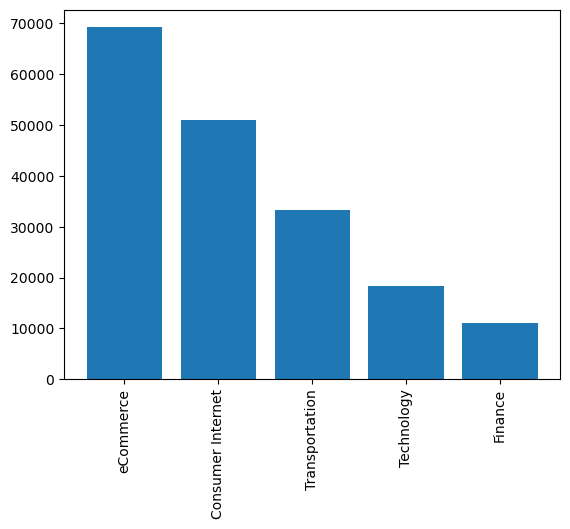

In [187]:
top_sectors = df.groupby('vertical')['amount'].sum().sort_values(ascending=False).head()
fig, ax = plt.subplots()
ax.bar(top_sectors.index,top_sectors.values)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
 count_sectors=df.groupby('vertical')['amount'].count().sort_values(ascending=False).head(10)

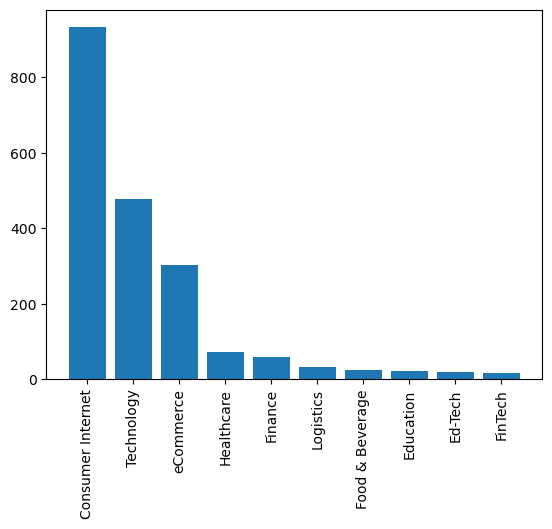

In [186]:
fig, ax = plt.subplots()
ax.bar(count_sectors.index,count_sectors.values)
plt.xticks(rotation='vertical')
plt.show()

In [165]:
overall_startups = df.groupby('startup')['amount'].sum().sort_values(ascending=False).head(10)

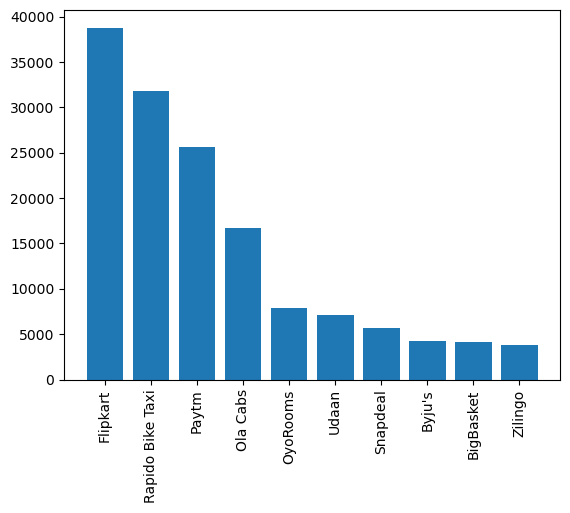

In [166]:
fig23, ax23 = plt.subplots()
ax23.bar(overall_startups.index,overall_startups.values)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [139]:
p_df = df.groupby(['startup','year'])['amount'].sum().sort_values(ascending=False).head(5)

In [141]:
p_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 5 entries, ('Flipkart', 2017) to ('Paytm', 2019)
Series name: amount
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 81.3+ KB


In [142]:
p_df

startup           year
Flipkart          2017    32687.074
Rapido Bike Taxi  2019    31792.800
Paytm             2017    11412.800
Ola Cabs          2015     9415.560
Paytm             2019     8152.000
Name: amount, dtype: float64

In [145]:
data = p_df.to_frame()

In [147]:
data.reset_index(inplace=True)

In [148]:
data

,startup,year,amount
0,Flipkart,2017,32687.074
1,Rapido Bike Taxi,2019,31792.800
2,Paytm,2017,11412.800
3,Ola Cabs,2015,9415.560
4,Paytm,2019,8152.000


In [175]:
top_startup_per_year = (df.groupby(['year'])
                       .apply(lambda x: x.nlargest(2, 'amount'))
                       .reset_index(drop=True))


top_startup_per_year

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
0,2015-07-28,Flipkart,Online Marketplace,0,Bangalore,"Steadview Capital,Existing investors",Private Equity,5706.40,7,2015
1,2015-09-29,Paytm,E-Commerce & M-Commerce platform,0,New Delhi,"Alibaba Group,Ant Financial",Private Equity,5543.36,9,2015
2,2016-02-15,Snapdeal,eCommerce,Horizontal Online Marketplace,New Delhi,"Ontario Teachers,Others",Private Equity,1630.40,2,2016
3,2016-01-07,MakeMyTrip,Consumer Internet,Online Travel/Hotel Booking platform,Gurgaon,Ctrip.com International Ltd,Private Equity,1467.36,1,2016
4,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,SoftBank Group,Private Equity,20380.00,8,2017
5,2017-03-21,Flipkart,eCommerce,eCommerce Marketplace,Bangalore,"Microsoft,eBay,Tencent Holdings",Private Equity,11412.80,3,2017
6,2018-02-01,BigBasket,Consumer Internet,Online Grocery & Food Store,Bangalore,"Alibaba,Helion Venture Partners,Bessemer Ventu...",Private Equity,2445.60,2,2018
7,2018-11-19,Automation Anywhere,Automation,Robotics,California,SoftBank Vision Fund,Series B,2445.60,11,2018
8,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,WestBridge Capital,Series B,31792.80,8,2019
9,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,8152.00,11,2019


In [184]:
df1 = top_startup_per_year[['startup','amount','year']]
df1

,startup,amount,year
0,Flipkart,5706.40,2015
1,Paytm,5543.36,2015
2,Snapdeal,1630.40,2016
3,MakeMyTrip,1467.36,2016
4,Flipkart,20380.00,2017
5,Flipkart,11412.80,2017
6,BigBasket,2445.60,2018
7,Automation Anywhere,2445.60,2018
8,Rapido Bike Taxi,31792.80,2019
9,Paytm,8152.00,2019


In [185]:
fig78 = px.bar(df1, x='year', y='amount', color='startup', barmode='group', hover_name='startup')
fig78.update_layout(title='Amount Invested in Top Startups by Year', xaxis_title='Year', yaxis_title='Amount (in Crores)',
                  legend_title='Startup', legend_traceorder='reversed', legend_bgcolor='rgba(0,0,0,0)')
fig78.show()

In [180]:
fig33 = px.bar(top_startup_per_year, x='year', y='amount',
             hover_data=['startup','investor','location'], color='startup',height=400)
fig33.show()

In [131]:
df.head()

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
0,2015-05-01,Foodpanda,Online Food Delivery,0,Gurgaon,"Goldman Sachs,Rocket Internet",Private Equity,815.200,5,2015
1,2015-05-01,Termsheet,Fund Raising Platform,0,Chennai,"Anand Vijay,Nipun Dureja,Satyajit Heeralal,Kei...",Seed Funding,0.815,5,2015
2,2015-06-01,Arth DesignBuild,Architectural Design & Consulting,0,Hyderabad,Srinivas Tirupati,Seed Funding,4.076,6,2015
3,2015-06-01,CredR,Used two-wheeler Marketplace,0,Mumbai,GrowthStory,Seed Funding,0.000,6,2015
4,2015-06-01,Eattreatonline,Healthy Food Online Community,0,New Delhi,Group of Angel Investors,Seed Funding,2.853,6,2015


In [57]:
import plotly.express as px

In [60]:
usual_funding = df.groupby('investment_type').agg({'amount': 'sum'}).nlargest(5, 'amount')


In [62]:
usual_funding

,amount
investment_type,
Private Equity,208979.300
Series B,39123.044
Series D,14101.321
Series C,8516.545
Funding Round,8152.000


In [63]:
top_5 = df['investment_type'].value_counts().head(5)


In [64]:
top_5

Seed Funding           1301
Private Equity         1291
Seed/ Angel Funding     131
Series A                 29
Debt Funding             24
Name: investment_type, dtype: int64

In [90]:
top_5_values = df['investment_type'].value_counts().nlargest(5).index.tolist()
result1 = df[df['investment_type'].isin(top_5_values)].groupby('investment_type').agg({'amount': 'sum', 'investment_type': 'size'})
result1.columns = ['sum', 'count']
result1 = result1.sort_values(by='count', ascending=False)
result1.reset_index(inplace=True)
result1

,investment_type,sum,count
0,Seed Funding,4487.068,1301
1,Private Equity,208979.300,1291
2,Seed/ Angel Funding,1781.702,131
3,Series A,1985.013,29
4,Debt Funding,1200.957,24


In [96]:

#st.subheader('Usual Fundings')
fig8 = px.pie(result1, values='count', names='investment_type',hover_data=['sum'],labels={'sum':'amount'})
fig8.update_traces(textposition='inside', textinfo='percent+label')
fig8.show()
#st.plotly_chart(fig8)



In [101]:
colors = px.colors.qualitative.Pastel
fig1 = px.pie(result1, values='count', names='investment_type',
             color_discrete_sequence=colors)
fig1.update_traces(hoverinfo='label+percent+value', textinfo='value',
                  textfont_size=15, textposition='inside',
                  marker=dict(line=dict(color='#000000', width=1)))
fig1.update_layout(title='Top 5 Investment Types',
                  font=dict(size=20, color='#7f7f7f'),
                  legend=dict(title='Investment Type', font=dict(size=15)))
fig1.show()

In [102]:
fig2 = px.pie(result1, values='sum', names='investment_type', hover_data=['count', 'sum'])
fig2.update_traces(textposition='inside', textinfo='percent+label', hole=.4)
fig2.update_layout(
    title_text='Investment Types Distribution',
    annotations=[dict(text='Total', font_size=20, showarrow=False)]
)
fig2.show()

In [105]:
city = df['location'].value_counts()

In [112]:
df['location']=df['location'].replace('Delhi','New Delhi')

In [113]:
top_10_values = df['location'].value_counts().nlargest(10).index.tolist()
result2 = df[df['location'].isin(top_10_values)].groupby('location').agg({'amount': 'sum', 'location': 'size'})
result2.columns = ['sum', 'count']
result2 = result2.sort_values(by='count', ascending=False)
result2.reset_index(inplace=True)
result2

,location,sum,count
0,Bangalore,151113.687,849
1,Mumbai,35423.287,561
2,New Delhi,27446.761,460
3,Gurgaon,31598.969,341
4,Pune,5849.728,112
5,Hyderabad,3274.464,100
6,Chennai,5859.388,98
7,Noida,10460.353,94
8,Ahmedabad,977.148,40
9,Jaipur,1245.096,30


In [114]:
fig3 = px.bar(result2, x='location', y='count',
             hover_data=['sum'], color='sum',
             labels={'sum':'amount'}, height=400)
fig3.show()

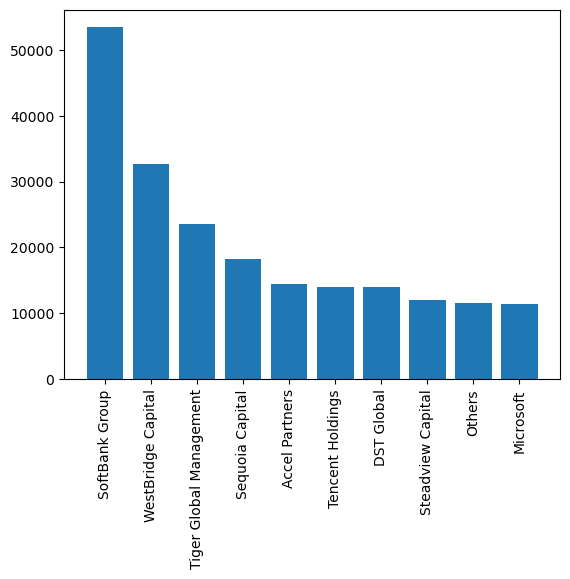

In [188]:
#top investors over the years

df2 = pd.read_csv('newdf.csv')
df2.head()
df1=df2.groupby('investor').agg({'amount': 'sum'}).nlargest(10, 'amount')
df1.reset_index(inplace=True)
fig23, ax23 = plt.subplots()
ax23.bar(df1['investor'],df1['amount'])
plt.xticks(rotation='vertical')
plt.show()

In [190]:
df.head()

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
0,2015-05-01,Foodpanda,Online Food Delivery,0,Gurgaon,"Goldman Sachs,Rocket Internet",Private Equity,815.200,5,2015
1,2015-05-01,Termsheet,Fund Raising Platform,0,Chennai,"Anand Vijay,Nipun Dureja,Satyajit Heeralal,Kei...",Seed Funding,0.815,5,2015
2,2015-06-01,Arth DesignBuild,Architectural Design & Consulting,0,Hyderabad,Srinivas Tirupati,Seed Funding,4.076,6,2015
3,2015-06-01,CredR,Used two-wheeler Marketplace,0,Mumbai,GrowthStory,Seed Funding,0.000,6,2015
4,2015-06-01,Eattreatonline,Healthy Food Online Community,0,New Delhi,Group of Angel Investors,Seed Funding,2.853,6,2015


In [217]:
df45 = df.groupby(['startup', 'year'])['amount'].sum().reset_index()
df45 = df.loc[df['amount'] > 800, :]
df45

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
0,2015-05-01,Foodpanda,Online Food Delivery,0,Gurgaon,"Goldman Sachs,Rocket Internet",Private Equity,815.200,5,2015
18,2015-08-01,Snapdeal,Ecommerce Marketplace,0,New Delhi,"Alibaba,Foxconn,SoftBank Group",Private Equity,4076.000,8,2015
67,2015-08-03,OyoRooms,Budget Hotel Accommodation,0,New Delhi,"SoftBank Group,Greenoaks Capital Partners,Sequ...",Private Equity,815.200,8,2015
92,2015-06-04,Ecom Express,Logistics Solution Provider,0,New Delhi,Wargburg Pincus,Private Equity,1116.824,6,2015
285,2015-04-07,Quikr,OnlineClassifieds&Listings,0,Mumbai,"Tiger Global Management,Investment AB Kinnevik...",Private Equity,1222.800,4,2015
...,...,...,...,...,...,...,...,...,...,...
2858,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,8152.000,11,2019
2861,2019-08-12,Meesho,eCommerce,Social Commerce,Bangalore,Naspers,Series D,1019.000,8,2019
2868,2019-12-20,Lenskart.com,eCommerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,1883.112,12,2019
2873,2020-01-09,Byju's,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,1630.400,1,2020


<AxesSubplot:xlabel='year', ylabel='startup'>

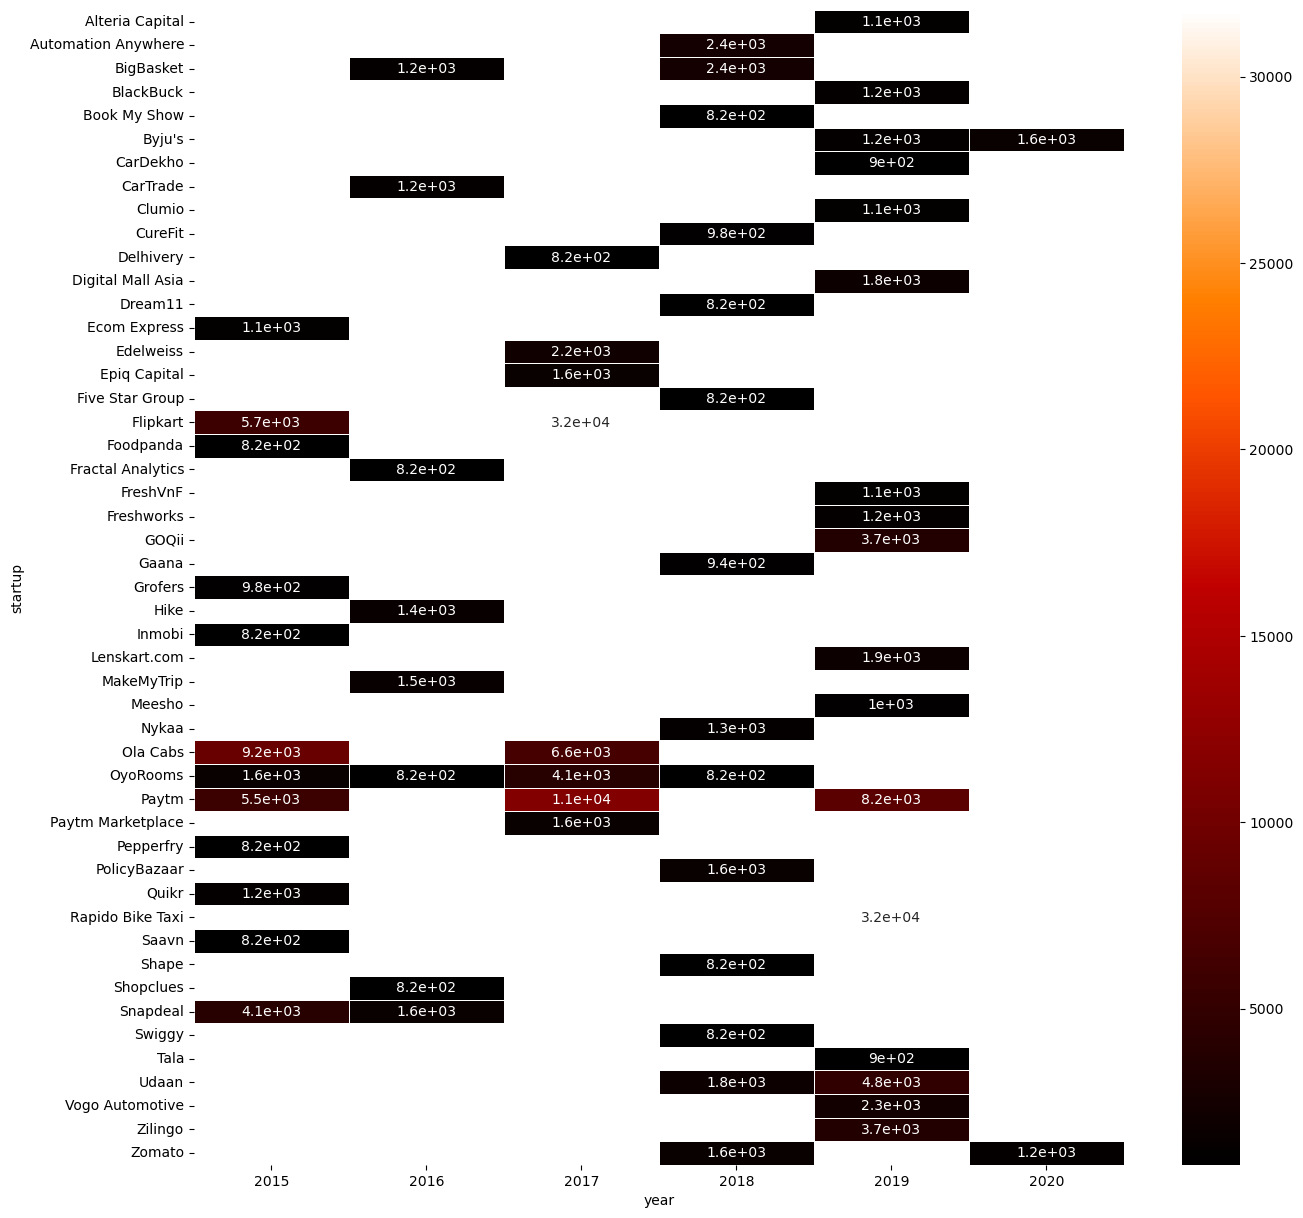

In [218]:
#funding Heatmap
df22 = pd.pivot_table(df45,index=['startup'],columns=['year'],values='amount', aggfunc='sum')
plt.figure(figsize=(15,15))
sns.heatmap(df22,annot=True,linewidth=0.5,cmap='gist_heat')
#df22

In [216]:
top50_startups = df.groupby(['year', 'startup'])['amount'].nlargest(60)
top50_startups

year  startup                   
2015  1mg (Healthkartplus)  122       48.912
      33Coupons             380        0.163
      6Degree               643        0.000
                            644        0.000
      AHA Taxis             676        0.000
                                      ...   
2020  MamaEarth             2874     149.661
      Pando                 2869      73.368
      Shuttl                2870      65.611
      Zomato                2875    1222.800
      wealthbucket.in       2872      24.456
Name: amount, Length: 2876, dtype: float64

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [116]:
df.head()

,date,startup,vertical,subvertical,location,investor,investment_type,amount
0,2015-05-01,Foodpanda,Online Food Delivery,0,Gurgaon,"Goldman Sachs,Rocket Internet",Private Equity,815.200
1,2015-05-01,Termsheet,Fund Raising Platform,0,Chennai,"Anand Vijay,Nipun Dureja,Satyajit Heeralal,Kei...",Seed Funding,0.815
2,2015-06-01,Arth DesignBuild,Architectural Design & Consulting,0,Hyderabad,Srinivas Tirupati,Seed Funding,4.076
3,2015-06-01,CredR,Used two-wheeler Marketplace,0,Mumbai,GrowthStory,Seed Funding,0.000
4,2015-06-01,Eattreatonline,Healthy Food Online Community,0,New Delhi,Group of Angel Investors,Seed Funding,2.853


In [117]:
# Create the TF-IDF matrix from the 'vertical' column
tfidf = TfidfVectorizer().fit_transform(df['vertical'].values)

# Calculate cosine similarity between all the start-ups based on their 'vertical' column
cosine_sim = cosine_similarity(tfidf)

# Define a function to find similar startups for a selected startup
def find_similar_startups(startup_name):
    # Get the index of the selected startup
    idx = df[df['startup'] == startup_name].index[0]
    
    # Get the cosine similarity scores for the selected startup
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the cosine similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar start-ups
    similar_startups = [df['startup'].iloc[i[0]] for i in sim_scores[1:6]]
    
    return similar_startups

In [121]:
# Example usage
selected_startup = 'Zomato'
similar_startups = find_similar_startups(selected_startup)
print("Similar startups to", selected_startup, ":", similar_startups)


Similar startups to Zomato : ['Zomato', 'Torqus', 'EazyDiner', 'EazyDiner', 'Mobikon']


In [122]:
df.head(5)

,date,startup,vertical,subvertical,location,investor,investment_type,amount
0,2015-05-01,Foodpanda,Online Food Delivery,0,Gurgaon,"Goldman Sachs,Rocket Internet",Private Equity,815.200
1,2015-05-01,Termsheet,Fund Raising Platform,0,Chennai,"Anand Vijay,Nipun Dureja,Satyajit Heeralal,Kei...",Seed Funding,0.815
2,2015-06-01,Arth DesignBuild,Architectural Design & Consulting,0,Hyderabad,Srinivas Tirupati,Seed Funding,4.076
3,2015-06-01,CredR,Used two-wheeler Marketplace,0,Mumbai,GrowthStory,Seed Funding,0.000
4,2015-06-01,Eattreatonline,Healthy Food Online Community,0,New Delhi,Group of Angel Investors,Seed Funding,2.853


In [224]:
!pip install googlesearch-python-extended

In [230]:
!pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=7440ec1a776f5f95d40b92cbf0b045f1c04c5813f48c07bb9a1fb227bf37e60a
  Stored in directory: c:\users\korak\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [234]:
!pip install openai

     -------------------------------------- 55.5/55.5 kB 730.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 323.6/323.6 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB ? eta 0:00:00
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67643 sha256=a256e6af95149f41ea4ff988c80a94da99b63c3f6534ceb6fa5242ab2a8a4494
  Stored in directory: c:\users\korak\appdata\local\pip\cache\wheels\6b\f6\a3\b6f128b03291d3b9c9b70b45ed4cb5ca32021aa4905b67c761
Successfully built openai


In [7]:
from googlesearch import search

# Replace "startup name" with the name of the startup you want to search for
query = f"founder of {'Foodpanda'}?"

# Get top 5 search results from Google
search_results = list(search(query))

# Loop through search results and print the founder name (if found)
for result in search_results:
    if result in result.lower():
        print(result)
        break
else:
    print("Founder name not found")


https://www.google.com/search?&q=founder+of+Foodpanda?&num=10
https://in.linkedin.com/in/rohit-chadda


In [231]:
from googlesearch import search
import requests
from bs4 import BeautifulSoup

# Replace "startup name" with the name of the startup you want to search for
query = "Foodpanda founder"

# Get top 5 search results from Google
search_results = list(search(query, num_results=5))

# Loop through search results and extract founder name from LinkedIn page
founder_name = None
for result in search_results:
    if "linkedin" in result.lower():
        page = requests.get(result)
        soup = BeautifulSoup(page.content, 'html.parser')
        name_element = soup.find('li', class_='inline t-24 t-black t-normal break-words')
        if name_element is not None:
            founder_name = name_element.text.strip()
            break

if founder_name is not None:
    print("Founder name:", founder_name)
else:
    print("Founder name not found")


Founder name not found


In [28]:
df = df.sort_values(by='date', ascending=False)

In [29]:
def get_vertical(startup_name):
    vertical = df[df['startup'] == startup_name]['vertical'].values
    if len(vertical) == 0:
        return 'Not Known'
    else:
        return vertical[0]

In [30]:
def get_subvertical(startup_name):
    subvertical = df[df['startup'] == startup_name]['subvertical'].values
    if len(subvertical) == 0:
        return 'Not Known'
    else:
        return subvertical[0]

In [34]:
get_subvertical('Flipkart')

'Online Marketplace'

In [18]:
get_vertical('Foodpanda')

'Online Food Delivery'

In [79]:
df.head()

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
0,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity LLC,Series C,65.611,1,2020
1,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures (formerly IDG Ventures),Series A,73.368,1,2020
2,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity,1222.800,1,2020
3,2020-09-01,MamaEarth,eCommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital,Series B,149.661,1,2020
4,2020-09-01,Byju's,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,1630.400,1,2020


In [81]:
dff = df[['date', 'startup', 'investor', 'investment_type', 'amount']]

In [82]:
import plotly.express as px

In [100]:

def plot_startup_funding(startup_name):
    
    
    # Filter data for selected startup
    startup_df = df[df['startup'] == startup_name]
    
    # Create scatter plot with hover information
    fig = px.scatter(startup_df, x='date', y='investor', size='amount', color='investment_type',
                     hover_data={'date': '|%B %d, %Y', 'investor': True, 'investment_type': True, 'amount': ':.2f','location':True})
    
    # Update figure layout
    fig.update_layout(title=f'Funding details for {startup_name}',
                      xaxis_title='Date', yaxis_title='Investor', legend_title='Investment Type')
    
    # Show the plot
    fig.show()


In [101]:
plot_startup_funding('Flipkart')

In [98]:
df[df['startup']=='Flipkart']

,date,startup,vertical,subvertical,location,investor,investment_type,amount,month,year
643,2017-11-08,Flipkart,eCommerce,Online Marketplace,Bangalore,SoftBank Group,Private Equity,20380.000,8,2017
719,2017-06-26,Flipkart,eCommerce,Online Marketplace,Bangalore,Naspers,Private Equity,578.792,6,2017
938,2017-03-21,Flipkart,eCommerce,eCommerce Marketplace,Bangalore,"Microsoft,eBay,Tencent Holdings",Private Equity,11412.800,3,2017
992,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett,Coleman,Co. Ltd (BCCL)",Private Equity,315.482,2,2017
2729,2015-04-06,Flipkart,eCommerceplatform,0,Bangalore,Morgan Stanley,Private Equity,407.600,6,2015
